# ノードの中心性

In [1]:
import numpy as np
import networkx as nx

%matplotlib inline

In [2]:
DRAW_CONFIG = {
    'node_color': 'white',
    'edgecolors': 'black', # line color of nodes
    'with_labels': True,
    'node_size': 600,
    'font_size': 14,
    'font_family': 'Arial',
}

ノードの**中心性（centrality）** とは，グラフにおける各ノードの重要性を示す指標であり，中心性の大きさはグラフ構造に基づき計算される．
ノードの中心性は，重要ノードの発見やノードのランキングなどに利用される．
ノード中心性評価はグラフ分析における典型的タスクである．

中心性指標は様々なものが提案されている．
以下は代表的な中心性であるが，分析に適した中心性はグラフの何に注目したいかによって変わる．

## 近接中心性

**近接中心性（closeness centrality）** は，注目ノードとグラフ中の他のノードとの距離が平均的にどの程度近いかを示す指標である．
「中心性」という言葉の直感に最も合う中心性指標かもしれない．
グラフ$G=(V, E)$に属するノード$v_i$からノード$v_j$への最短経路を$dist(v_i, v_j)$，ノード$v_i$に接するノード集合を$V_{adjacent}$としたとき，ノード$v_i$の近接中心性$c_{closeness}(v_i)$は

$$
\begin{align}
c_{closeness}(v_i) &= \frac{1}{v_iからの平均距離} \\
&=\frac{|V|-1}{\sum_{v_j \in V_{adjacent}}dist(v_i, v_j)}
\end{align}
$$

と定義される．
平均値の計算の際，$|V|$ではなく$|V|-1$で割るのは，計算対象となる自分自身を除いたノードの平均を取りたいからである．
また，平均距離の逆数をとっているのは，距離が近いと中心性スコアの値が大きくなるようにするためである．

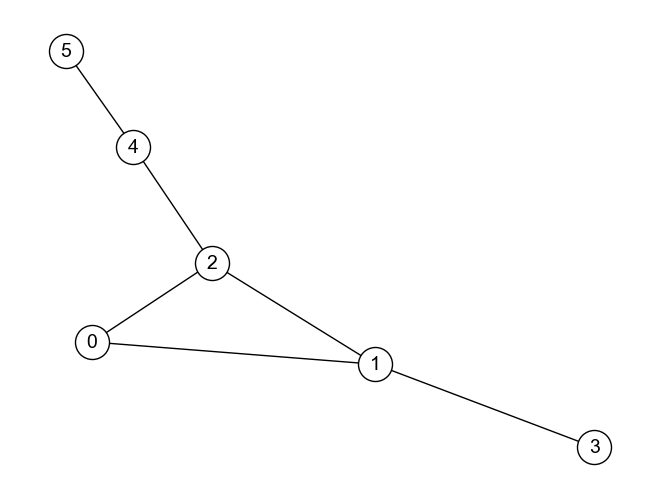

In [3]:
G_bull = nx.Graph([(0, 1), (1, 2), (2, 0), (1, 3), (2, 4), (4, 5)])
pos = nx.spring_layout(G_bull, seed=12345)
nx.draw(G_bull, pos, **DRAW_CONFIG)

上のグラフ$G_{bull}$に属するノード2とノード5の近接中心性を考えてみよう．
ノード2とノード5から他のノードへの（最短）距離は以下の図のようになる．

![](img/closeness-example.jpg)

これら距離の値を先の近接中心性の定義式に当てはめると，
- ノード2の近接中心性は$\frac{5}{7}$
- ノード5の近接中心性は$\frac{5}{13}$

となる．

近接中心性をNetworkXで求めるには`closeness_centrality`関数を用いる．
以下，上のグラフ$G_{bull}$の各ノードの近接中心性を求めるコードである．

In [4]:
# グラフを定義しておく
G_bull = nx.Graph([(0, 1), (1, 2), (2, 0), (1, 3), (2, 4), (4, 5)])

# 近接中心性
nx.closeness_centrality(G_bull)

{0: 0.5555555555555556,
 1: 0.625,
 2: 0.7142857142857143,
 3: 0.4166666666666667,
 4: 0.5555555555555556,
 5: 0.38461538461538464}

## 次数中心性

**次数中心性（degree centrality）** は，注目ノードがいくつのノードと接しているか（どの程度エッジを持つか）を示す指標である．
なんのこっちゃない，[前回](graph-structure-features.ipynb)で説明した次数を使った指標である．

グラフ$G=(V, E)$に属するノード$v$が持つエッジ数を$deg(v)$としたとき，ノード$v_i$の次数中心性$c_{degree}(v)$は

$$
c_{degree}(v) = deg(v)
$$

である．
式から明らかなように，次数中心性は次数である．
上の定義の場合，グラフのサイズが大きくなると次数中心性も大きくなり，中心性の相対的な差が分かりづらくなる．
そのため，以下のように，次数をノード数で正規化したものを次数中心性とする場合もある．

$$
c_{degree}(v) = \frac{deg(v)}{|V|-1}
$$

近接中心性の説明で用いたグラフ$G_{bull}$において，ノード2の正規化していない次数中心性は3である．
また，正規化されたノード2の次数中心性は$3/5=0.6$となる．

正規化された次数中心性をNetworkXで求めるには`degree_centrality`関数を用いる．
以下，上のグラフ$G_{bull}$の各ノードの次数中心性を求めるコードである．

In [5]:
# 正規化された次数中心性
nx.degree_centrality(G_bull)

# 正規化されていない次数中心性は以下で求められる（既出）
# G_bull.degree

{0: 0.4, 1: 0.6000000000000001, 2: 0.6000000000000001, 3: 0.2, 4: 0.4, 5: 0.2}

有向グラフにおいては，次数中心性を**入次数**（ノードに入ってくるエッジの数）と**出次数**（ノードから出て行くエッジの数）に分けて考えることができる．
例えば以下のグラフ$G_{directedbull}$において，
- ノード2の入次数は3，出次数は0
- ノード1の入次数は2，出次数は2

となる．

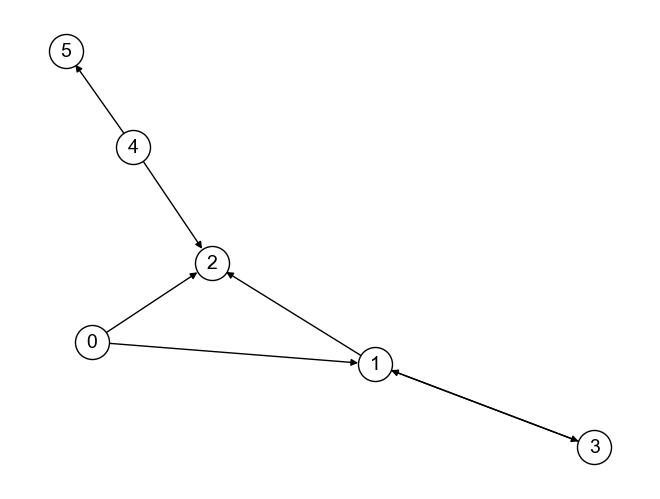

In [6]:
G_directed_bull = nx.DiGraph([(0, 1), (1, 2), (0, 2), (3, 1), (1, 3), (4, 2), (4, 5)])
nx.draw(G_directed_bull, pos, **DRAW_CONFIG)

入次数中心性，出次数中心性をNetworkXで求めるには`in_degree_centrality`および`out_degree_centrality`関数を用いる．
以下，上のグラフ$G_{directedbull}$の各ノードの次数中心性を求めるコードである．

In [7]:
# グラフを定義しておく
G_directed_bull = nx.DiGraph([(0, 1), (1, 2), (0, 2), (3, 1), (1, 3), (4, 2), (4, 5)])

# 正規化された入次数中心性
nx.in_degree_centrality(G_directed_bull)

{0: 0.0, 1: 0.4, 2: 0.6000000000000001, 3: 0.2, 4: 0.0, 5: 0.2}

In [8]:
# 正規化された出次数中心性
nx.out_degree_centrality(G_directed_bull)

{0: 0.4, 1: 0.4, 2: 0.0, 3: 0.2, 4: 0.4, 5: 0.0}

## 固有ベクトル中心性

次数中心性は計算も解釈も極めてシンプルであるため，グラフ分析で頻繁に用いられる．
しかし，次数中心性がノードの重要度指標としてふさわしくない（or 迷う）時もある．
以下の2つのグラフを見てみよう．

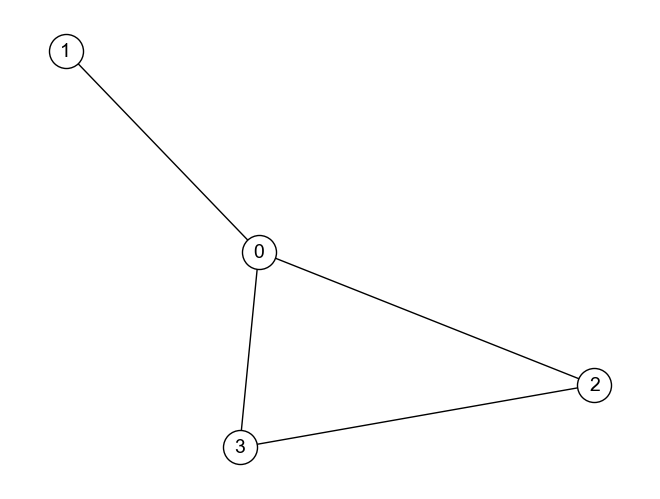

In [9]:
G = nx.star_graph(3)
G.add_edge(2, 3)
nx.draw(G, **DRAW_CONFIG)

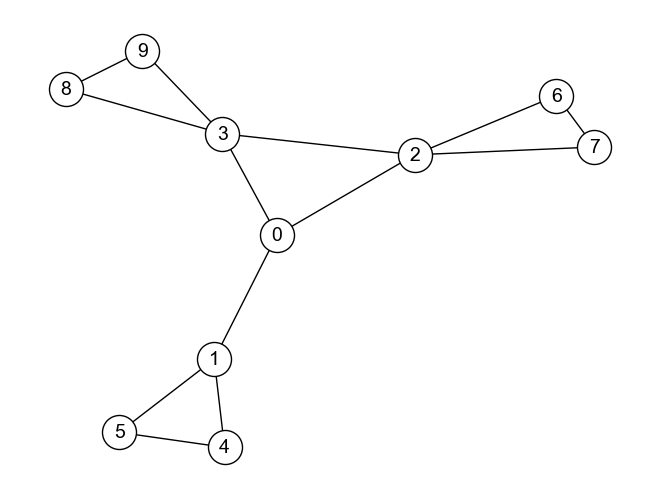

In [10]:
G_ameba = nx.Graph([
    (0, 1), (0, 2), (0, 3), (2, 3),
    (1, 4), (1, 5), (4, 5),
    (2, 6), (2, 7), (6, 7),
    (3, 8), (3, 9), (8, 9),
])

nx.draw(G_ameba, **DRAW_CONFIG)

1つ目のグラフ$G$において，ノード0の次数中心性は3である．
一方，2つ目のグラフ$G_{ameba}$におけるノード0の次数中心性も3である．

この2つのグラフが，人物の友好関係を示していた場合のことを考えてみよう．
どちらのグラフにおいてもノード0の人物と繋がっているのは3人であるが，グラフ$G$においてノード0に繋がっているノードは他のノードとの繋がりが少ない．
一方，グラフ$G_{ameba}$においてノード0に繋がっているノードは，他のノードと密に繋がっている．
言うなれば，グラフ$G_{ameba}$においてノード0は友好関係が多いノード3つと繋がっており，友好関係が乏しいノード3つと繋がっている場合よりも影響力が大きそうである．
この観察から，ノードの重要性を評価するにはノードの数も重要だが，どんなノードと繋がっているかも重要と考えられる．

この考えに基づく中心性指標が**固有ベクトル中心性（eigenvector centrality）** である．
固有ベクトル中心性は「重要なノードと多く接続しているノードを重要」とする指標である．

さて．この固有ベクトル中心性の定義は再帰的（堂々巡り）な定義になっているが，どのように計算するのであろうか．
再度以下のグラフ$G$に戻って，固有ベクトル中心性を計算してみよう．

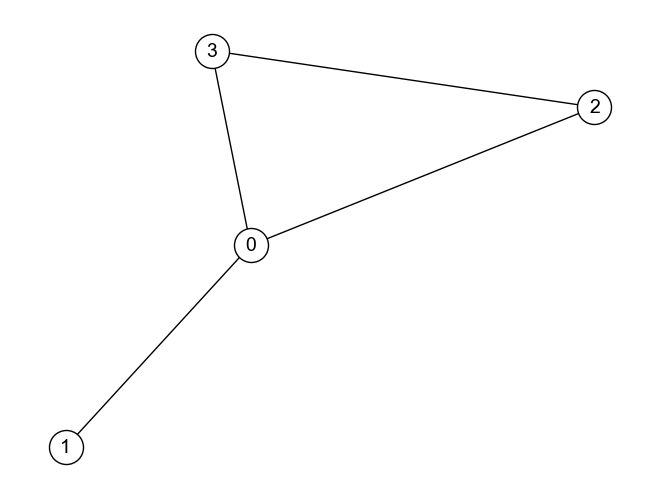

In [11]:
nx.draw(G, **DRAW_CONFIG)

とりあえず，各ノードの中心性スコアを1としてスタートしよう．
固有ベクトル中心性の定義は「重要なノードと多く接続しているノードを重要」となっているので，あるノードの中心性を計算は，そのノードに繋がっているノードの中心性スコアの和をとることにしよう．
例えば，ノード0の固有ベクトル中心性$c_e(v_0)$の計算は

$$
\begin{align}
c_e(v_0) &= c_e(v_1) + c_e(v_2) + c_e(v_3) \\
&= 1 + 1 + 1 \\
&= 3
\end{align}
$$

といった具合である．
同じ操作を他のノードにも適用すると，
- ノード1の中心性スコアは1
- ノード2の中心性スコアは2
- ノード3の中心性スコアは2

となる．
スタート時点の各ノードの中心性スコアを

$$c^1_e = (1, 1, 1, 1)$$

というベクトル表記で書くことにすると，定義に基づく操作後の中心性スコアは

$$c^2_e=(3,1,2,2)$$

と書くことができる．
中心性スコアが更新されたので，同じ操作を繰り返してみよう．
ただし，このまま操作をすると，中心性のスコアがどんどん大きくなっていってしまう．
一方，中心性スコアはグラフにおけるノードの順位付けに使うため，スコアは相対的な指標であればよい．
そこで，各ノードの中心性の二乗和が1になるよう制約（スコアの変換）を加えながら，同じ操作を繰り返すことにする．
先の$c^2_e$を変換すると，変換後のベクトルは

$$c^2_e=(\frac{3}{\sqrt{18}},\frac{1}{\sqrt{18}},\frac{2}{\sqrt{18}},\frac{2}{\sqrt{18}})$$

となる．

では，定義に従う操作をどんどん繰り返そう．
同じ操作を$n$回繰り返した結果，中心性スコアのベクトルとして

$$c^n_e=(c^n_e(v_0), c^n_e(v_1), c^n_e(v_2), c^n_e(v_3))$$

が得られたとしよう．
これを用いてn+1回目の操作を行うと，ノード0の中心性スコア$c^{n+1}_e(v_0)$は

$$
c^{n+1}_e(v_0) = c^{n+1}_e(v_1) + c^{n+1}_e(v_2) + c^{n+1}_e(v_3)
$$

となる．
ところで，今までこの操作を何度も繰り返してきたが，グラフ$G$の隣接行列

$$
A =
    \left(
    \begin{array}{cccc}
    0 & 1 & 1 & 1 \\
    1 & 0 & 0 & 0 \\
    1 & 0 & 0 & 1 \\
    1 & 0 & 1 & 0 
    \end{array}
    \right)
$$

を用いると，先のノード0の中心性スコア$c^{n+1}_e(v_0)$を求める計算は，

$$
\begin{align}
c^{n+1}_e(v_0) &= 0 \cdot c^{n+1}_e(v_0) + 1 \cdot c^{n+1}_e(v_1) + 1 \cdot c^{n+1}_e(v_2) + 1 \cdot c^{n+1}_e(v_3) \\
&= A_{0,0} \cdot c^{n+1}_e(v_0) + A_{0,1} \cdot c^{n+1}_e(v_1) + A_{0,2} \cdot c^{n+1}_e(v_2) + A_{0,3} \cdot c^{n+1}_e(v_3) \\
\end{align}
$$

と書ける．
つまり，隣接行列$A$とベクトル$c^n_e$の積を計算し，得られたベクトルのの0番目の要素を取得することに相当する．
ということは，$n+1$回定義に基づく中心性計算をした後のスコアベクトルは，

$$
c^{n+1}_e = Ac^{n}_e
$$

という行列で計算できる．

さて，$n+1$回目まで繰り返した計算をその後も続けると，あるところでスコアが変化しなくなる．
このときのスコアを固有ベクトル中心性の値として採用する．

ところで，スコアが変化しなくなった状態は以下のように表現できる．

$$
c_e = Ac_e
$$

$\lambda=1$とすると，上記式は

$$
\lambda c_e = Ac_e
$$

と書き換えることができる．
この式をどこかで見た記憶はないだろうか．
そう，この式は行列の固有値を求めるときのものである．
先ほどまで行ってきた計算は，実は隣接行列$A$の（第1固有値に対応する）固有ベクトルを求める操作と同じ事をしていたのである．
これが，固有ベクトル中心性の「固有ベクトル」という修飾句の由来である．

固有ベクトル中心性をNetworkXで求めるには`eigenvector_centrality`関数を用いる．
以下，上のグラフ$G$の各ノードの固有ベクトル中心性を求めるコードである．

In [12]:
nx.eigenvector_centrality(G)

{0: 0.6116286437343043,
 1: 0.2818457979386572,
 2: 0.5227204550943348,
 3: 0.5227204550943348}

上記コードで求めた値が，上でツラツラと説明してきた繰り返し操作で得られる値と一致するか，確かめてみよう．
隣接行列と固有ベクトル中心性の初期値をベクトルとして用意すれば，あとは

1. 行列の積を採る
2. 得られたベクトルを要素の二乗和が1になるよう変換

という処理を繰り返せばよい．
このコードは以下のように書ける．

In [13]:
import numpy as np

# グラフGを定義
G = nx.Graph([(0, 1), (0, 2), (0, 3), (2, 3)])

# Gの隣接行列
A = nx.adjacency_matrix(G).toarray()

# 固有ベクトル中心性のベクトルを初期化（要素がすべて1のベクトル）
x = np.ones(G.number_of_nodes())

# 行列の積をとる操作を100回繰り返す
for i in range(100):
    x = A @ x

    # 行列の積計算で得られたベクトルを要素の二乗和が1になるよう変換
    x = x / np.linalg.norm(x)

# 100回操作後の固有ベクトル中心性の値
x

array([0.61162846, 0.2818452 , 0.52272073, 0.52272073])

値が`eigenvector_centrality`関数の返り値とほぼ一致することが確認できる．

良さそうに見える固有ベクトル中心性も適用できないグラフが存在する．
それは，強連結でない有向グラフである（強連結であればOK）．
例えば，以下のグラフ$G_{weaklyconnected}$は強連結でない．
`eigenvector_centrality`関数を用いて，グラフ$G_{weaklyconnected}$の固有ベクトル中心性を計算してみよう．

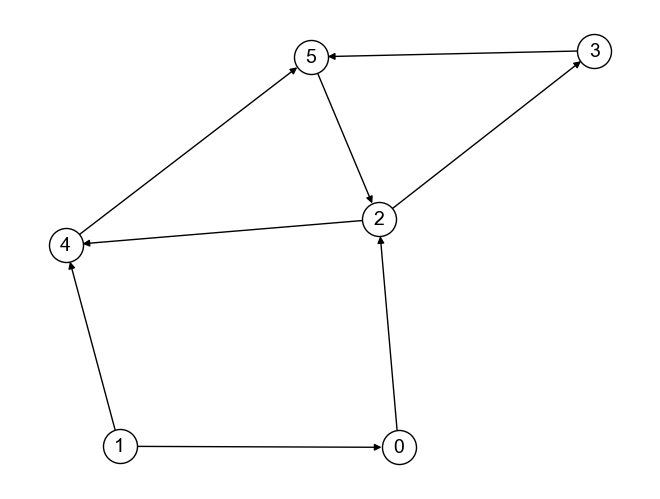

In [14]:
G_weakly_connected = nx.DiGraph([
    (1, 0), (0, 2), (2, 3), (1, 4),
    (2, 4), (3, 5), (4, 5), (5, 2)
])

pos = nx.spring_layout(G_weakly_connected, seed=123)
nx.draw(G_weakly_connected, pos, **DRAW_CONFIG)

In [15]:
# グラフの定義
G_weakly_connected = nx.DiGraph([
    (1, 0), (0, 2), (2, 3), (1, 4),
    (2, 4), (3, 5), (4, 5), (5, 2)
])

# 強連結でないことを確認
nx.is_strongly_connected(G_weakly_connected)

False

In [16]:
# 固有ベクトル中心性の計算
nx.eigenvector_centrality(G_weakly_connected)

{1: 5.751458071240267e-08,
 0: 1.150291614248053e-06,
 2: 0.5098250599444331,
 3: 0.404647801108178,
 4: 0.4046488938852115,
 5: 0.642337791187098}

得られた数値を見てみると，ノード0とノード1の値がほぼゼロになっている．
ノード1はどのノードからもエッジを張られていない（入次数がゼロ）なので，固有ベクトル中心性の値がゼロになるのは納得ができる．
一方，ノード0はノード1からエッジが張られているため，直感的にはスコアを多少持ってもよいはずで，ゼロなのは納得できない．

このように，強連結でない有向グラフの場合，入次数がゼロのノードからしかエッジが張られていないノードは重要度がゼロになってしまい，固有ベクトル中心性を意図通りに計算できない．
そのため．「重要なノードからエッジを多く張られているノードは重要」というコンセプトで中心性を計算するには，別の工夫が必要となる（この工夫については，[後の講](content/web-and-graph.ipynb)で説明する）．

なお，以下のグラフ$G_{stronglyconnected}$のように，強連結な有向グラフは問題なく固有ベクトル中心性を計算できる．

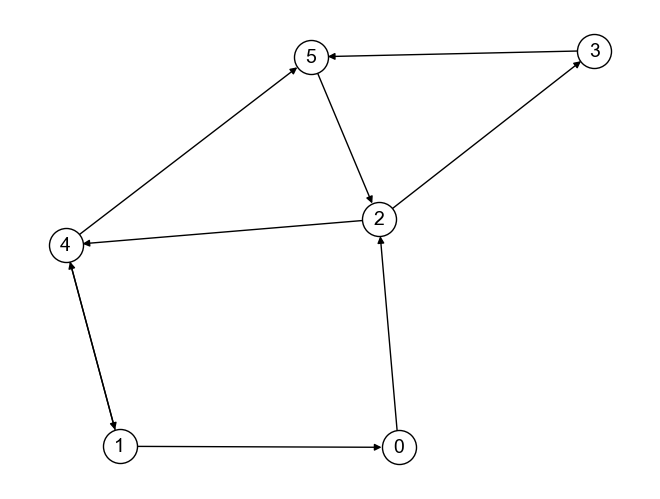

In [17]:
G_strongly_connected = nx.DiGraph([
    (1, 0), (0, 2), (2, 3), (1, 4), (4, 1),
    (2, 4), (3, 5), (4, 5), (5, 2)
])

nx.draw(G_strongly_connected, pos, **DRAW_CONFIG)

In [18]:
# グラフの定義
G_strongly_connected = nx.DiGraph([
    (1, 0), (0, 2), (2, 3), (1, 4), (4, 1),
    (2, 4), (3, 5), (4, 5), (5, 2)
])

# 強連結であることを確認
nx.is_strongly_connected(G_strongly_connected)

True

In [19]:
# 固有ベクトル中心性の計算
nx.eigenvector_centrality(G_strongly_connected)

{1: 0.3287379381257333,
 0: 0.2108662630530237,
 2: 0.47023438323101086,
 3: 0.301630380053154,
 4: 0.512496640300148,
 5: 0.5222190340080454}

## 媒介中心性

次数中心性，固有ベクトル中心性はエッジの数に着目した中心性であったが，媒介中心性はグラフの経路に着目した指標である．
**媒介中心性（betweenness centrality）** は，注目ノードがそれ以外のノード間の経路に含まれる割合を示す中心性指標である．
直感的には，ノードがどの程度「経路上の要所」になっているかを測るものである．
例えば，グラフの中でコミュニティをつなぐ橋渡し役になっているノード，交通の要所となるノードなどを求める際に有効な指標である．

例えば，以下のグラフ$G_{barbell}$において，ノード3はグラフの左（ノード4, 5, 6）から右（ノード0, 1, 2）に移動するあたり，絶対に通る必要があるため「経路上の要所」としての重要度が高いと考えられる．
一方，ノード5はそれを経由しなくても他のノードに到達することは可能であるため，「経路上の要所」という観点からは重要度が低いと考えられる．

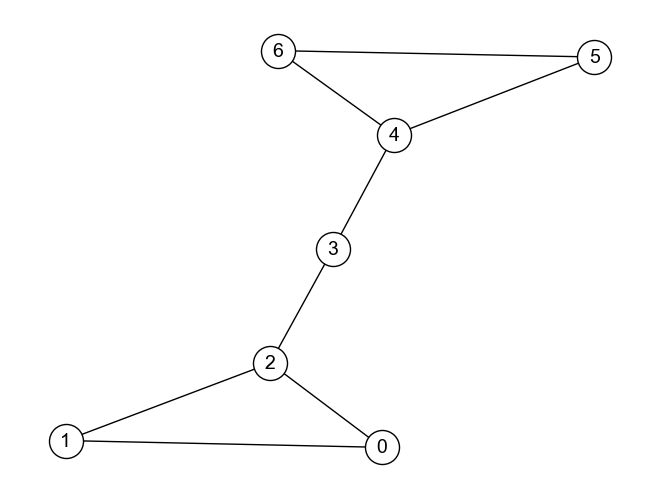

In [20]:
G_barbell = nx.barbell_graph(3, 1)
nx.draw(G_barbell, **DRAW_CONFIG)

ノード3とノード5の媒介中心性を計算してみよう．
まず，グラフ$G_{barbell}$にはノードが7つあるため，計算対象を除くノード間の経路の候補は${}_6 C_2=15$通りある．
そのうちノード3を経由する経路は9，ノード5を経由する経路は0なので，
- ノード3の媒介中心性 $=\frac{9}{15}$
- ノード5の媒介中心性 $=\frac{0}{15}$

となる．

媒介中心性をNetworkXで求めるには`betweenness_centrality`関数を用いる．
以下，上のグラフ$G_{barbell}$の各ノードの媒介ベクトル中心性を求めるコードである．

In [21]:
# 媒介中心性
nx.betweenness_centrality(G_barbell)

{0: 0.0,
 1: 0.0,
 2: 0.5333333333333333,
 4: 0.5333333333333333,
 5: 0.0,
 6: 0.0,
 3: 0.6}

---

## クイズ

### Q1: 近接中心性
以下のグラフ$G_{bull}$に属する各ノードの近接中心性について，`closeness_centrality`関数を用いずに計算するコードを書きなさい．

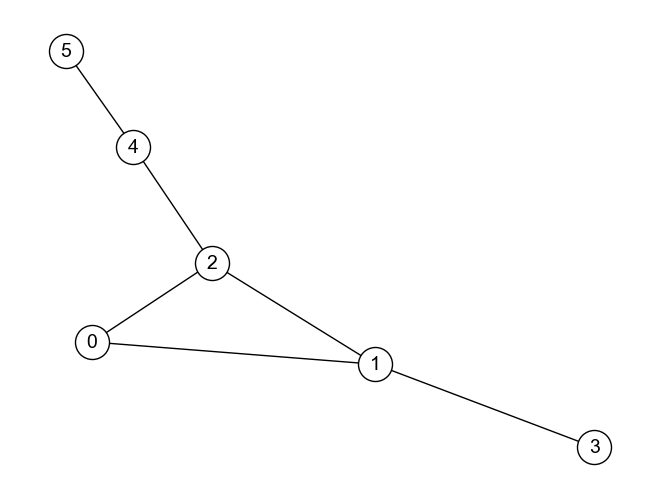

In [22]:
DRAW_CONFIG = {
    'node_color': 'white',
    'edgecolors': 'black', # line color of nodes
    'with_labels': True,
    'node_size': 600,
    'font_size': 14,
    'font_family': 'Arial',
}

G_bull = nx.Graph([(0, 1), (1, 2), (2, 0), (1, 3), (2, 4), (4, 5)])
pos = nx.spring_layout(G_bull, seed=12345)
nx.draw(G_bull, pos, **DRAW_CONFIG)

In [23]:
import networkx as nx

# グラフの定義
G_bull = nx.Graph([(0, 1), (1, 2), (2, 0), (1, 3), (2, 4), (4, 5)])

# Write your code



### Q2: どんなグラフ？

ノード数が5のグラフのうち，以下の条件を満たすノードを持つグラフの例を考えなさい．

1. 次数中心性，近接中心性，媒介中心性のいずれも最大値を持つノードが同一であるような無向グラフ
2. 次数中心性，近接中心性，媒介中心性の値がすべてのノードで同じになる無向グラフ
3. 出次数中心性は最大値を取るが，媒介中心性は最小値を取るノードが存在する有向グラフ

### Q3: 都道府県の近接中心性，次数中心性，媒介中心性

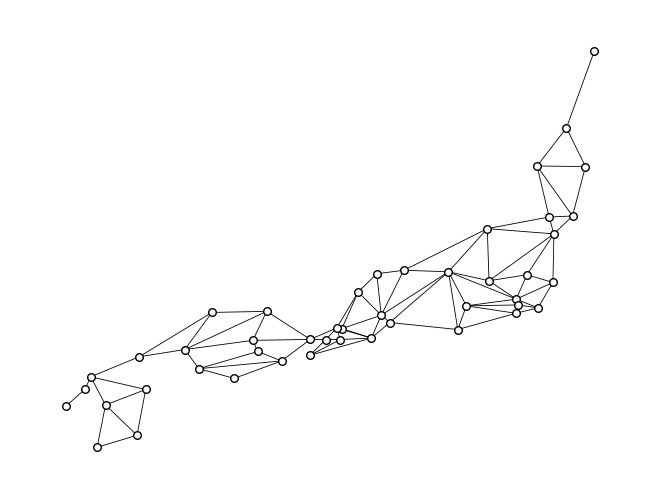

In [24]:
import pandas as pd

QUIZ_DRAW_CONFIG = {
    'node_size': 30,
    'with_labels': False,
    'width': 0.6,
    'edgecolors': 'black',
    'node_color': 'white',
}

G_prefecture = nx.read_adjlist("data/prefecture/prefecture.adjlist")

url = "https://gist.githubusercontent.com/ctsaran/42728dad3c7d8bd91f1d/raw/017718dde64f70e221f0e2bb0487a6c975d6195d/gistfile1.txt"
df = pd.read_table(url, sep='\t', header=None)
df.columns = ['pid', 'prefecture', 'lat', 'lng']
pos = {row['prefecture']: (row['lng'], row['lat']) for _, row in df.iterrows()}

nx.draw(G_prefecture, pos, **QUIZ_DRAW_CONFIG)

上のグラフ$G_{prefecture}$は，沖縄県を除く日本の都道府県をノード，都道府県間の陸路の存在をエッジとして可視化したものである．
グラフ$G_{prefecture}$に含まれる各ノード（都道府県）について，その近接中心性，次数中心性，媒介中心性を計算し，各指標の上位3件を求めなさい．

なお，グラフ$G_{prefecture}$に関するデータは[コチラ](data/prefecture/prefecture.adjlist)からダウンロード可能である．
また，以下のコードを書くとダウンロードしたファイルをNetworkX形式のグラフとして読み込める．

In [25]:
import networkx as nx

# ダウンロードしたデータは`data/prefecture/prefecture.adjlist`にあると想定
G_prefecture = nx.read_adjlist("data/prefecture/prefecture.adjlist")

### Q4: 空港の次数中心性，媒介中心性，固有ベクトル中心性

In [26]:
from pyvis.network import Network
import warnings
warnings.filterwarnings('ignore')

G_ana = nx.read_adjlist("data/airport/ana.adjlist")

# pyvisで可視化
g = Network(width=800, height=600, notebook=True, cdn_resources='remote')
g.from_nx(G_ana)
g.show('../_build/html/airport.html')

../_build/html/airport.html


In [27]:
from IPython.display import IFrame
IFrame("../airport.html", width=750, height=650)

上のグラフ$G_{airport}$は，日本の主要な空港をノード，空港間でANA（全日空）の航路が存在することをエッジとして可視化したものである．
グラフ$G_{airport}$に含まれる各ノード（空港）について，その次数中心性，媒介中心性，固有ベクトル中心性を計算し，各指標の上位5件を求めなさい．

なお，グラフ$G_{airport}$に関するデータは[コチラ](data/airport/ana.adjlist)からダウンロード可能である．
また，以下のコードを書くとダウンロードしたファイルをNetworkX形式のグラフとして読み込める．

In [28]:
import networkx as nx

# ダウンロードしたデータは`data/airport/ana.adjlist`にあると想定
G_ana = nx.read_adjlist("data/airport/ana.adjlist")